# Mini Project 2
## Visual Computing Lab

Name: Haardik Ravat <br>
Roll No.: B20EE021

## Libraries and Imports

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader,sampler,Dataset
import torchvision.datasets as dset
import torchvision.transforms as T
import timeit
from PIL import Image
import os
import numpy as np
import scipy.io
from sklearn.model_selection import StratifiedShuffleSplit
#plotting and visualization library
import matplotlib.pyplot as plt
#Display on the notebook
%matplotlib inline
plt.ion() #Turn interactive mode on.
import torch.nn.functional as F
import os
import cv2
from torchvision.transforms.functional import to_pil_image

In [ ]:
# device='cpu'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
!gdown -O miniproj2.zip "https://drive.google.com/u/0/uc?id=1SRPEyBtFCXPnh8FYT_rA5ul-cssvv-h3&export=download"

Downloading...
From: https://drive.google.com/u/0/uc?id=1SRPEyBtFCXPnh8FYT_rA5ul-cssvv-h3&export=download
To: /content/miniproj2.zip
100% 149M/149M [00:00<00:00, 207MB/s]


In [ ]:
!unzip miniproj2.zip

Archive:  miniproj2.zip
   creating: miniproj2_ds_vid/
   creating: miniproj2_ds_vid/laugh/
  inflating: miniproj2_ds_vid/laugh/American_History_X_laugh_h_nm_np1_fr_goo_44.avi  
  inflating: miniproj2_ds_vid/laugh/American_History_X_laugh_h_nm_np1_fr_med_14.avi  
  inflating: miniproj2_ds_vid/laugh/best_laugh_attack_ever!_laugh_h_nm_np1_fr_goo_0.avi  
  inflating: miniproj2_ds_vid/laugh/best_laugh_attack_ever!_laugh_h_nm_np1_fr_goo_1.avi  
  inflating: miniproj2_ds_vid/laugh/best_laugh_attack_ever!_laugh_h_nm_np1_fr_goo_2.avi  
  inflating: miniproj2_ds_vid/laugh/Best_laugh_ever_laugh_h_cm_np1_fr_goo_0.avi  
  inflating: miniproj2_ds_vid/laugh/Best_laugh_ever_laugh_h_cm_np1_fr_goo_1.avi  
  inflating: miniproj2_ds_vid/laugh/Best_laugh_ever_laugh_h_cm_np1_fr_goo_2.avi  
  inflating: miniproj2_ds_vid/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_bad_17.avi  
  inflating: miniproj2_ds_vid/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_bad_4.avi  
  inflating: miniproj2_ds_vid

In [ ]:
!ls  -lh

total 143M
drwxr-xr-x 7 root root 4.0K Sep 22  2022 miniproj2_ds_vid
-rw-r--r-- 1 root root 143M Oct  8 16:29 miniproj2.zip
drwxr-xr-x 1 root root 4.0K Oct  5 19:33 sample_data


## Creating Datasets and Frames

In [ ]:
path2data = "./"
sub_folder = "miniproj2_ds_vid"
sub_folder_jpg = "miniproj2_jpg"
path2aCatgs = os.path.join(path2data, sub_folder)

listOfCategories = os.listdir(path2aCatgs)
listOfCategories, len(listOfCategories)

(['pullup', 'pour', 'punch', 'pick', 'laugh'], 5)

In [ ]:
dic={}
for cat in listOfCategories:
    print("category:", cat)
    path2acat = os.path.join(path2aCatgs, cat)
    listOfSubs = os.listdir(path2acat)
    dic[cat]=len(listOfSubs)
    print("number of sub-folders:", len(listOfSubs))
    print("-"*50)

category: pullup
number of sub-folders: 79
--------------------------------------------------
category: pour
number of sub-folders: 80
--------------------------------------------------
category: punch
number of sub-folders: 80
--------------------------------------------------
category: pick
number of sub-folders: 80
--------------------------------------------------
category: laugh
number of sub-folders: 80
--------------------------------------------------


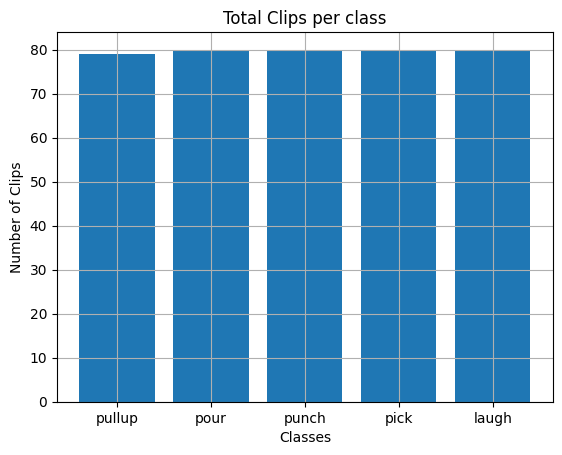

In [ ]:
names = list(dic.keys())
values = list(dic.values())
plt.bar(range(len(dic)), values, tick_label=names)
plt.xlabel('Classes')
plt.ylabel('Number of Clips')
plt.title('Total Clips per class')
plt.grid()
plt.show()

In [ ]:
def get_frames(filename, n_frames= 1):
    frames = []
    v_cap = cv2.VideoCapture(filename)
    # Get number of frames
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # creates sequences of evenly spaced values within a defined interval
    frame_list= np.linspace(0, v_len-1, n_frames+1, dtype=np.int16)

    for fn in range(v_len):
        success, frame = v_cap.read()
        if success is False:
            continue
        if (fn in frame_list):
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
    v_cap.release()
    return frames, v_len

def store_frames(frames, path2store):
    for ii, frame in enumerate(frames):
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        path2img = os.path.join(path2store, "frame"+str(ii)+".jpg")
        cv2.imwrite(path2img, frame)

In [ ]:
extension = ".avi"
n_frames = 16
for root, dirs, files in os.walk(path2aCatgs, topdown=False):
    for name in files:
        if extension not in name:
            continue
        path2vid = os.path.join(root, name)
        frames, vlen = get_frames(path2vid, n_frames= n_frames)
        path2store = path2vid.replace(sub_folder, sub_folder_jpg)
        path2store = path2store.replace(extension, "")
        print(path2store)
        os.makedirs(path2store, exist_ok= True)
        store_frames(frames, path2store)
    print("-"*50)

./miniproj2_jpg/pullup/Proper_Way_to_Do_Pull_Ups_pullup_u_nm_np1_ri_goo_3
./miniproj2_jpg/pullup/20_Marine_Corps_Pull_Ups_-_JimmyDShea_pullup_u_cm_np1_ba_bad_1
./miniproj2_jpg/pullup/Basic_Exercise_Plans_-_How_to_Do_a_Pull-Up_pullup_f_cm_np1_le_goo_0
./miniproj2_jpg/pullup/22_Pull-ups_with_Speed_and_Perfect_Form_pullup_f_cm_np1_ba_med_1
./miniproj2_jpg/pullup/girl_pull_ups_fitness_exercise_pullups_pullup_f_cm_np1_fr_med_1
./miniproj2_jpg/pullup/46_Pull_ups_pullup_f_cm_np1_fr_bad_1
./miniproj2_jpg/pullup/20_Marine_Corps_Pull_Ups_-_JimmyDShea_pullup_f_cm_np1_ba_bad_4
./miniproj2_jpg/pullup/How_to_do_pull-ups_Chin_ups_pullup_u_cm_np1_fr_bad_1
./miniproj2_jpg/pullup/12_Pull-ups_by_female_athlete_pullup_f_cm_np1_ba_med_2
./miniproj2_jpg/pullup/FREESTYLIN_ON_THE_PULL-BAR_pullup_u_cm_np1_le_med_2
./miniproj2_jpg/pullup/Perfect_Pull_Up_-_How_To_Do_Pull_Ups_pullup_u_cm_np1_fr_goo_2
./miniproj2_jpg/pullup/Konstantinovs_55_pullups_pullup_u_cm_np1_ri_med_0
./miniproj2_jpg/pullup/Eight_wide_grip_pu

## Getting Labels

In [ ]:
def get_vids(path2ajpgs):
    listOfCats = os.listdir(path2ajpgs)
    ids = []
    labels = []
    for catg in listOfCats:
        path2catg = os.path.join(path2ajpgs, catg)
        listOfSubCats = os.listdir(path2catg)
        path2subCats= [os.path.join(path2catg,los) for los in listOfSubCats]
        ids.extend(path2subCats)
        labels.extend([catg]*len(listOfSubCats))
    return ids, labels, listOfCats

In [ ]:
path2ajpgs= "miniproj2_jpg/"
all_vids, all_labels, catgs = get_vids(path2ajpgs)
len(all_vids), len(all_labels), len(catgs)

(399, 399, 5)

In [ ]:
all_vids[:1], all_labels[:3], catgs

(['miniproj2_jpg/pullup/FREESTYLIN_ON_THE_PULL-BAR_pullup_u_cm_np1_fr_med_0'],
 ['pullup', 'pullup', 'pullup'],
 ['pullup', 'pour', 'punch', 'pick', 'laugh'])

In [ ]:
labels_dict = {}
ind = 0
for uc in catgs:
    labels_dict[uc] = ind
    ind+=1
labels_dict

{'pullup': 0, 'pour': 1, 'punch': 2, 'pick': 3, 'laugh': 4}

In [ ]:
num_classes =5
unique_ids = [id_ for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
unique_labels = [label for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
len(unique_ids),len(unique_labels)

(399, 399)

In [ ]:
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
train_indx, test_indx = next(sss.split(unique_ids, unique_labels))

train_ids = [unique_ids[ind] for ind in train_indx]
train_labels = [unique_labels[ind] for ind in train_indx]
print(len(train_ids), len(train_labels))

test_ids = [unique_ids[ind] for ind in test_indx]
test_labels = [unique_labels[ind] for ind in test_indx]
print(len(test_ids), len(test_labels))

319 319
80 80


In [ ]:
from collections import Counter

train_dic = dict(Counter(train_labels))
print(train_dic)

{'punch': 64, 'pour': 64, 'laugh': 64, 'pick': 64, 'pullup': 63}


In [ ]:
from collections import Counter

test_dic = dict(Counter(test_labels))
print(test_dic)

{'laugh': 16, 'punch': 16, 'pullup': 16, 'pick': 16, 'pour': 16}


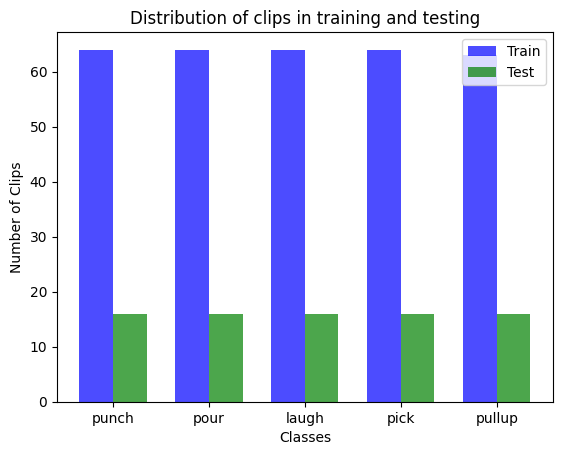

In [ ]:
keys = train_dic.keys()
train_values = train_dic.values()
test_values = test_dic.values()

bar_width = 0.35
index = range(len(keys))

plt.bar(index, train_values, bar_width, label='Train', alpha=0.7, color='b', align='center')
plt.bar([i + bar_width for i in index], test_values, bar_width, label='Test', alpha=0.7, color='g', align='center')

plt.xlabel('Classes')
plt.ylabel('Number of Clips')
plt.title('Distribution of clips in training and testing')
plt.xticks([i + bar_width/2 for i in index], keys)
plt.legend()

plt.show()


## Video Dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader, Subset
import glob
from PIL import Image
import random

class VideoDataset(Dataset):
    def __init__(self, ids, labels, transform):
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)


        frames_tr = []
        for frame in frames:
            frame = self.transform(frame)
            frames_tr.append(frame)
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [ ]:
import torchvision.transforms as transforms
h, w = 128, 128
mean = [0.43216, 0.394666, 0.37645]
std = [0.22803, 0.22145, 0.216989]
train_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])

In [ ]:
timesteps = n_frames
train_ds = VideoDataset(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

319


In [ ]:
imgs, label = train_ds[10]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 128, 128]), 4, tensor(-1.8952), tensor(2.8556))

In [ ]:
test_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])
test_ds = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

80


In [ ]:
imgs, label = test_ds[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 128, 128]), 4, tensor(-1.8952), tensor(2.8014))

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
clip_dataloader_train = DataLoader(train_ds, batch_size=8,
                        shuffle=True, num_workers=4)
clip_dataloader_test = DataLoader(test_ds, batch_size=8,
                        shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Samples of Frames

In [ ]:
def denormalize(x_, mean, std):
    x = x_.clone()
    for i in range(3):
        x[i] = x[i]*std[i]+mean[i]
    x = to_pil_image(x)
    return x

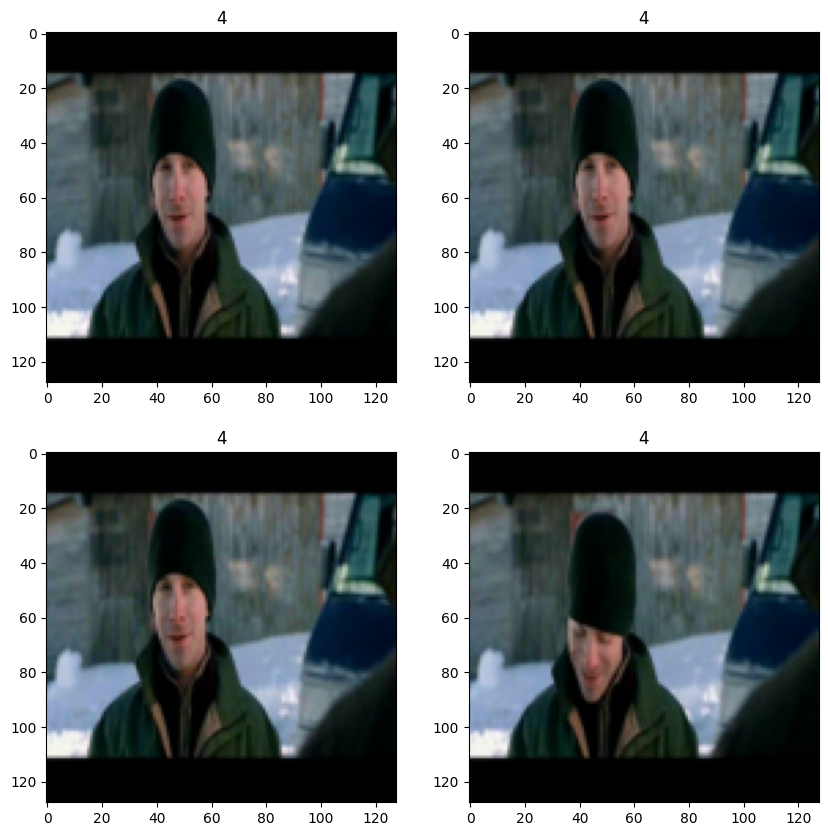

In [ ]:
plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.title(label)

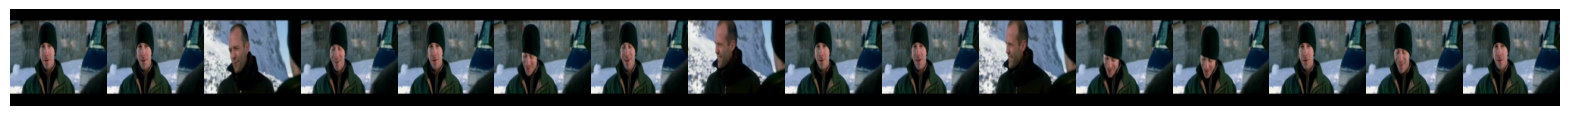

In [ ]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0, hspace=0)
for ii,img in enumerate(imgs[::1]):
    plt.subplot(1,16,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.axis("off")

## Classifiers

### Model

In [ ]:
def train_3d(model, loss_fn, optimizer,dataloader,testing_dataloader,num_epochs = 1):

    tr_loss={}
    tr_acc={}
    test_loss={}
    test_acc={}
    for epoch in range(num_epochs):
        with torch.no_grad():
            x,l=check_accuracy_3d(model, testing_dataloader,loss_fn, True)
            y,qr=check_accuracy_3d(model, dataloader,loss_fn, False)
            tr_acc[epoch+1]=y
            test_acc[epoch+1]=x
            test_loss[epoch+1]=l
        print('Starting epoch %d / %d' % (epoch + 1, num_epochs))

        model.train()


        for t, sample in enumerate(dataloader):
            x_var = sample[0].to(device)#['clip']#.to(device)
            y_var = sample[1].long().to(device)#['Label'].long()#.to(device)

            scores = model(x_var)

            loss = loss_fn(scores, y_var)
            tr_loss[epoch+1]=loss.item()
            if (t + 1) % print_every == 0:
                print('t = %d, loss = %.4f' % (t + 1, loss.data.item()))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    return tr_loss,tr_acc,test_loss,test_acc


def check_accuracy_3d(model, loader,loss_fn, test=False):
    num_correct = 0
    num_samples = 0
    model.eval() # Put the model in test mode (the opposite of model.train(), essentially)
    for t, sample in enumerate(loader):
        x_var = sample[0].to(device)#['clip']#.to(device)
        y_var = sample[1]#['Label']
        y_var=y_var.cpu()
        scores = model(x_var)
        _, preds = scores.data.cpu().max(1)
        loss = loss_fn(scores, y_var.cuda())
        num_correct += (preds.numpy() == y_var.numpy()).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    if(test):
      print('Test Accuracy %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

    else:
      print('Train Accuracy %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
    return 100*acc,loss.item()

In [ ]:
class Net3D(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net3D, self).__init__()

        #calling conv3d module for convolution
        self.conv1 = nn.Conv3d(in_channels = n_frames, out_channels = 50, kernel_size = 2, stride = 1)

        #calling MaxPool3d module for max pooling with downsampling of 2
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=2)

        self.conv2 =  nn.Conv3d(in_channels = 50, out_channels = 100, kernel_size = (1, 3, 3), stride = 1)

        self.pool2 = nn.MaxPool3d(kernel_size=(1, 3, 3), stride=2)



        #fully connected layer
        self.fc1 = nn.Linear(100*30*30, 512)
        self.fc2 = nn.Linear(512,64)
        self.fc3 = nn.Linear(64,5)


    #defining the structure of the network
    def forward(self, x):
        #Applying relu activation after each conv layer
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        # print(x.shape)

        #reshaping to 1d for giving input to fully connected units
        x = x.view(-1, 100*30*30)

        x = self.fc1(F.relu(x))
        x = self.fc2(F.relu(x))
        x = self.fc3(x)
        return x

fixed_model_3d = Net3D().to(device)

#Printing the network architecture
print(fixed_model_3d)

Net3D(
  (conv1): Conv3d(16, 50, kernel_size=(2, 2, 2), stride=(1, 1, 1))
  (pool1): MaxPool3d(kernel_size=(1, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv3d(50, 100, kernel_size=(1, 3, 3), stride=(1, 1, 1))
  (pool2): MaxPool3d(kernel_size=(1, 3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=90000, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(fixed_model_3d.parameters(), lr=1e-4)

In [ ]:
print_every=20
fixed_model_3d.train()
a,b,c,d=train_3d(fixed_model_3d, loss_fn, optimizer,clip_dataloader_train,clip_dataloader_test, num_epochs=10)
fixed_model_3d.eval()
with torch.no_grad():

    check_accuracy_3d(fixed_model_3d, clip_dataloader_train,loss_fn)
    check_accuracy_3d(fixed_model_3d, clip_dataloader_test,loss_fn, True)

Test Accuracy 16 / 80 correct (20.00)
Train Accuracy 62 / 319 correct (19.44)
Starting epoch 1 / 10
t = 20, loss = 1.3650
t = 40, loss = 1.6535
Test Accuracy 38 / 80 correct (47.50)
Train Accuracy 136 / 319 correct (42.63)
Starting epoch 2 / 10
t = 20, loss = 1.2650
t = 40, loss = 1.3073
Test Accuracy 35 / 80 correct (43.75)
Train Accuracy 156 / 319 correct (48.90)
Starting epoch 3 / 10
t = 20, loss = 1.3243
t = 40, loss = 1.4559
Test Accuracy 38 / 80 correct (47.50)
Train Accuracy 177 / 319 correct (55.49)
Starting epoch 4 / 10
t = 20, loss = 1.0307
t = 40, loss = 1.1757
Test Accuracy 37 / 80 correct (46.25)
Train Accuracy 185 / 319 correct (57.99)
Starting epoch 5 / 10
t = 20, loss = 1.3002
t = 40, loss = 1.7069
Test Accuracy 38 / 80 correct (47.50)
Train Accuracy 150 / 319 correct (47.02)
Starting epoch 6 / 10
t = 20, loss = 0.9621
t = 40, loss = 1.0887
Test Accuracy 35 / 80 correct (43.75)
Train Accuracy 206 / 319 correct (64.58)
Starting epoch 7 / 10
t = 20, loss = 0.9262
t = 40, 

In [ ]:
a,b,c,d

({1: 1.6534640789031982,
  2: 1.3073055744171143,
  3: 1.4559319019317627,
  4: 1.1757363080978394,
  5: 1.7068560123443604,
  6: 1.0886510610580444,
  7: 0.9915581941604614,
  8: 0.6838381886482239,
  9: 0.6378889679908752,
  10: 0.5377048254013062},
 {1: 19.435736677115987,
  2: 42.63322884012539,
  3: 48.90282131661442,
  4: 55.4858934169279,
  5: 57.993730407523515,
  6: 47.02194357366771,
  7: 64.57680250783699,
  8: 71.47335423197492,
  9: 77.74294670846395,
  10: 67.39811912225704},
 {1: 1.6303550004959106,
  2: 1.4289203882217407,
  3: 1.2024176120758057,
  4: 1.05869722366333,
  5: 0.8279012441635132,
  6: 1.3693573474884033,
  7: 0.9393153786659241,
  8: 0.9798489809036255,
  9: 0.8930736780166626,
  10: 1.1771929264068604},
 {1: 20.0,
  2: 47.5,
  3: 43.75,
  4: 47.5,
  5: 46.25,
  6: 47.5,
  7: 43.75,
  8: 48.75,
  9: 51.24999999999999,
  10: 48.75})

### Plots

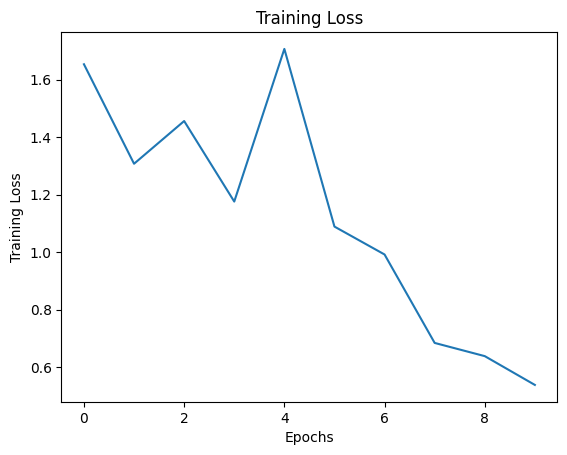

In [ ]:
names = list(a.keys())
values = list(a.values())
plt.plot(range(len(a)), values)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss')
# plt.grid()
plt.show()

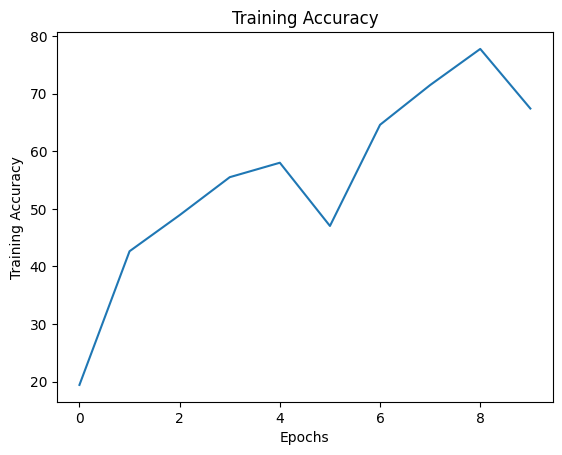

In [ ]:
names = list(b.keys())
values = list(b.values())
plt.plot(range(len(b)), values)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy')
# plt.grid()
plt.show()

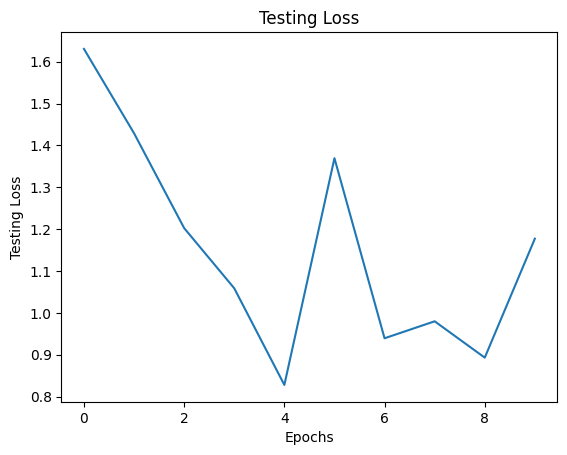

In [ ]:
names = list(c.keys())
values = list(c.values())
plt.plot(range(len(c)), values)
plt.xlabel('Epochs')
plt.ylabel('Testing Loss')
plt.title('Testing Loss')
# plt.grid()
plt.show()

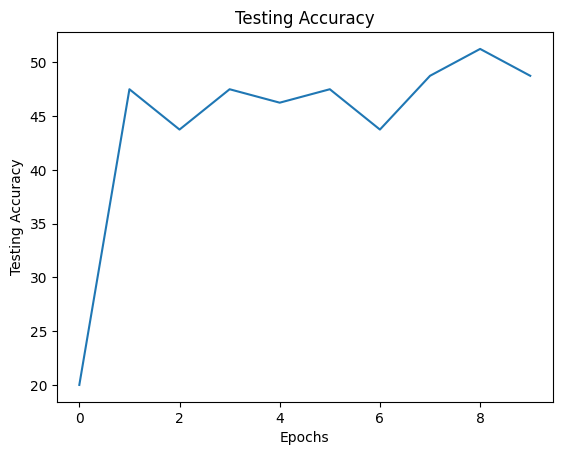

In [ ]:
names = list(d.keys())
values = list(d.values())
plt.plot(range(len(d)), values)
plt.xlabel('Epochs')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy')
# plt.grid()
plt.show()

## Using 2-8 frames to test

In [ ]:
def accr(model, loader, test=False):
    num_correct = 0
    num_samples = 0
    model.eval() # Put the model in test mode (the opposite of model.train(), essentially)
    for t, sample in enumerate(loader):
        x_var = sample[0].to(device)#['clip']#.to(device)
        y_var = sample[1]#['Label']
        y_var=y_var.cpu()
        scores = model(x_var)
        _, preds = scores.data.cpu().max(1)

        num_correct += (preds.numpy() == y_var.numpy()).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    if(test):
      print('Test Accuracy %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

    else:
      print('Train Accuracy %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
    return 100*acc

### Using 2 frames to test

In [ ]:
class VideoDataset_red(Dataset):
    def __init__(self, ids, labels, transform):
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)


        frames_tr = []
        count=0
        for frame in frames:
          if(count%8==0):
            frame = self.transform(frame)
            frames_tr.append(frame)
            frames_tr.append(frame)
            frames_tr.append(frame)
            frames_tr.append(frame)
            frames_tr.append(frame)
            frames_tr.append(frame)
            frames_tr.append(frame)
            frames_tr.append(frame)
          count+=1
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [ ]:
train_ds_red = VideoDataset_red(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

319


In [ ]:
imgs, label = train_ds_red[10]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 128, 128]), 4, tensor(-1.8952), tensor(2.7652))

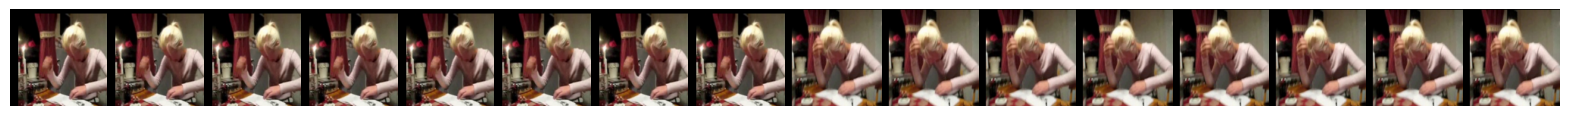

In [ ]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0, hspace=0)
for ii,img in enumerate(imgs[::1]):

    plt.subplot(1,16,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.axis("off")

In [ ]:
test_ds_red = VideoDataset_red(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

80


In [ ]:
imgs, label = test_ds_red[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 128, 128]), 4, tensor(-1.8952), tensor(2.7652))

In [ ]:
clip_dataloader_train_red = DataLoader(train_ds_red, batch_size=8,
                        shuffle=True, num_workers=4)
clip_dataloader_test_red = DataLoader(test_ds_red, batch_size=8,
                        shuffle=False, num_workers=4)

In [ ]:
otr2=accr(fixed_model_3d, clip_dataloader_train_red)
ots2=accr(fixed_model_3d, clip_dataloader_test_red,True)

Train Accuracy 212 / 319 correct (66.46)
Test Accuracy 37 / 80 correct (46.25)


### Using 4 frames to test

In [ ]:
class VideoDataset_red4(Dataset):
    def __init__(self, ids, labels, transform):
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)


        frames_tr = []
        count=0
        for frame in frames:
            if(count%4==0):
                frame = self.transform(frame)
                frames_tr.append(frame)
                frames_tr.append(frame)
                frames_tr.append(frame)
                frames_tr.append(frame)
            count+=1
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [ ]:
train_ds_red4 = VideoDataset_red4(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

319


In [ ]:
imgs, label = train_ds_red4[10]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 128, 128]), 4, tensor(-1.8952), tensor(2.8556))

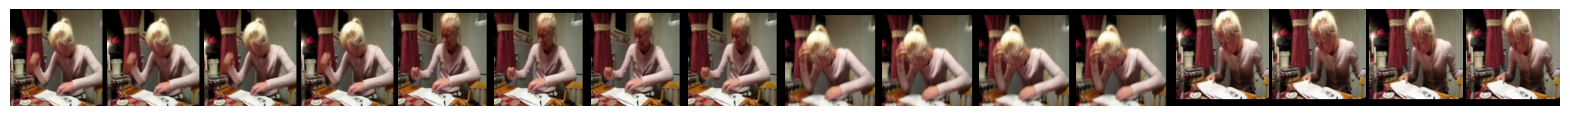

In [ ]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0, hspace=0)
for ii,img in enumerate(imgs[::1]):

    plt.subplot(1,16,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.axis("off")

In [ ]:
test_ds_red4 = VideoDataset_red4(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

80


In [ ]:
imgs, label = test_ds_red4[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 128, 128]), 4, tensor(-1.8952), tensor(2.8014))

In [ ]:
clip_dataloader_train_red4 = DataLoader(train_ds_red4, batch_size=8,
                        shuffle=True, num_workers=4)
clip_dataloader_test_red4 = DataLoader(test_ds_red4, batch_size=8,
                        shuffle=False, num_workers=4)

In [ ]:
otr4=accr(fixed_model_3d, clip_dataloader_train_red4)
ots4=accr(fixed_model_3d, clip_dataloader_test_red4)

Train Accuracy 235 / 319 correct (73.67)
Train Accuracy 40 / 80 correct (50.00)


### Using 6 frames to test

In [ ]:
class VideoDataset_red6(Dataset):
    def __init__(self, ids, labels, transform):
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)


        frames_tr = []
        count=1
        for frame in frames:
            if(count%5==0):
                frame = self.transform(frame)
                frames_tr.append(frame)
                frames_tr.append(frame)
                frames_tr.append(frame)
                frames_tr.append(frame)
                frames_tr.append(frame)
            count+=1
            if(count==16):
              frames_tr.append(frame)
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [ ]:
train_ds_red6 = VideoDataset_red6(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

319


In [ ]:
imgs, label = train_ds_red6[10]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 128, 128]), 4, tensor(-1.8952), tensor(2.7291))

In [ ]:
test_ds_red6 = VideoDataset_red6(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

80


In [ ]:
imgs, label = test_ds_red6[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 128, 128]), 4, tensor(-1.8952), tensor(2.7652))

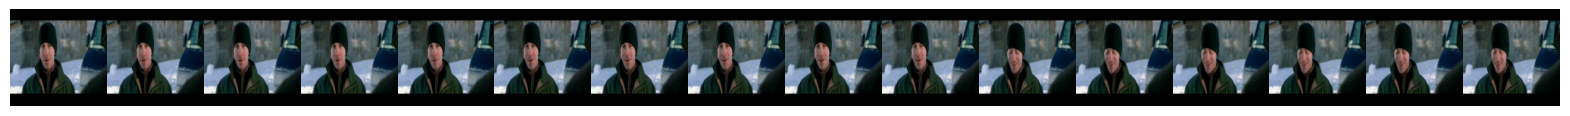

In [ ]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0, hspace=0)
for ii,img in enumerate(imgs[::1]):
  if(ii<16):
    plt.subplot(1,16,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.axis("off")

In [ ]:
clip_dataloader_train_red6 = DataLoader(train_ds_red6, batch_size=8,
                        shuffle=True, num_workers=4)
clip_dataloader_test_red6 = DataLoader(test_ds_red6, batch_size=8,
                        shuffle=False, num_workers=4)

In [ ]:
otr6=accr(fixed_model_3d, clip_dataloader_train_red6)
ots6=accr(fixed_model_3d, clip_dataloader_test_red6)

Train Accuracy 231 / 319 correct (72.41)
Train Accuracy 40 / 80 correct (50.00)


### Using 8 frames to test

In [ ]:
class VideoDataset_red8(Dataset):
    def __init__(self, ids, labels, transform):
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)


        frames_tr = []
        count=0
        for frame in frames:
            if(count%2==0):
              frame = self.transform(frame)
              frames_tr.append(frame)
              frames_tr.append(frame)
            count+=1
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [ ]:
train_ds_red8 = VideoDataset_red8(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

319


In [ ]:
imgs, label = train_ds_red8[10]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 128, 128]), 4, tensor(-1.8952), tensor(2.8556))

In [ ]:
test_ds_red8 = VideoDataset_red8(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

80


In [ ]:
imgs, label = test_ds_red8[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 128, 128]), 4, tensor(-1.8952), tensor(2.8014))

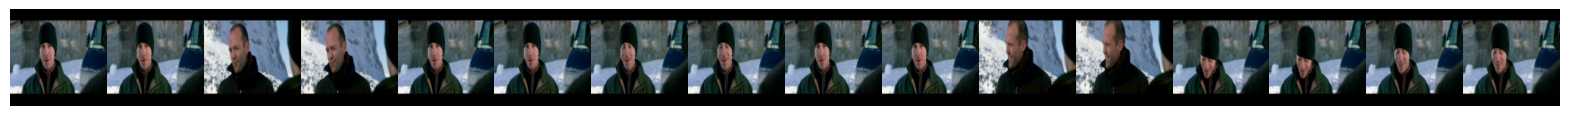

In [ ]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0, hspace=0)
for ii,img in enumerate(imgs[::1]):
    plt.subplot(1,16,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.axis("off")

In [ ]:
clip_dataloader_train_red8 = DataLoader(train_ds_red8, batch_size=8,
                        shuffle=True, num_workers=4)
clip_dataloader_test_red8 = DataLoader(test_ds_red8, batch_size=8,
                        shuffle=False, num_workers=4)

In [ ]:
otr8=accr(fixed_model_3d, clip_dataloader_train_red8)
ots8=accr(fixed_model_3d, clip_dataloader_test_red8)

Train Accuracy 239 / 319 correct (74.92)
Train Accuracy 41 / 80 correct (51.25)


## Improving the model

### New Model

In [ ]:
class Rnn3D(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Rnn3D, self).__init__()

        #calling conv3d module for convolution
        conv1 = nn.Conv3d(in_channels = n_frames, out_channels = 50, kernel_size = 2, stride = 1)

        #calling MaxPool3d module for max pooling with downsampling of 2
        pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=2)

        conv2 =  nn.Conv3d(in_channels = 50, out_channels = 100, kernel_size = (1, 3, 3), stride = 1)

        pool2 = nn.MaxPool3d(kernel_size=(1, 3, 3), stride=2)

        self.feat_extractor=nn.Sequential(conv1,nn.ReLU(),pool1,conv2,nn.ReLU(),pool2)

        self.rnn = nn.LSTM(input_size=5625, hidden_size=128, num_layers=1,batch_first=True)
        self.fc1 = nn.Linear(128, 5)



    def forward(self, x):

        b_z, ts, c, h, w = x.shape

        y = self.feat_extractor(x)

        # reinstating the batchsize and frames
        y = y.view(b_z,ts,-1)
        #output has a size of 8x16x128 - basically we have the output for each frame of each clip.
        outp, (hn, cn) = self.rnn(y)
        # We only need the RNN/LSTM output of the last frame since it incorporates all the frame knowledge
        out = self.fc1(outp[:,-1,:])
        return out



model_rnn = Rnn3D().to(device)

#Printing the network architecture
print(model_rnn)


Rnn3D(
  (feat_extractor): Sequential(
    (0): Conv3d(16, 50, kernel_size=(2, 2, 2), stride=(1, 1, 1))
    (1): ReLU()
    (2): MaxPool3d(kernel_size=(1, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv3d(50, 100, kernel_size=(1, 3, 3), stride=(1, 1, 1))
    (4): ReLU()
    (5): MaxPool3d(kernel_size=(1, 3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (rnn): LSTM(5625, 128, batch_first=True)
  (fc1): Linear(in_features=128, out_features=5, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_rnn.parameters(), lr=1e-4)

In [ ]:
model_rnn.train()
print_every = 20
a,b,c,d=train_3d(model_rnn, loss_fn, optimizer,clip_dataloader_train,clip_dataloader_test, num_epochs=10)
model_rnn.eval()
check_accuracy_3d(model_rnn, clip_dataloader_train,loss_fn)
check_accuracy_3d(model_rnn, clip_dataloader_test,loss_fn,True)

Test Accuracy 15 / 80 correct (18.75)
Train Accuracy 68 / 319 correct (21.32)
Starting epoch 1 / 10
t = 20, loss = 1.6055
t = 40, loss = 1.6365
Test Accuracy 25 / 80 correct (31.25)
Train Accuracy 97 / 319 correct (30.41)
Starting epoch 2 / 10
t = 20, loss = 1.4477
t = 40, loss = 1.3328
Test Accuracy 34 / 80 correct (42.50)
Train Accuracy 152 / 319 correct (47.65)
Starting epoch 3 / 10
t = 20, loss = 1.4113
t = 40, loss = 1.3392
Test Accuracy 40 / 80 correct (50.00)
Train Accuracy 152 / 319 correct (47.65)
Starting epoch 4 / 10
t = 20, loss = 1.3942
t = 40, loss = 1.2570
Test Accuracy 41 / 80 correct (51.25)
Train Accuracy 164 / 319 correct (51.41)
Starting epoch 5 / 10
t = 20, loss = 1.0149
t = 40, loss = 1.1455
Test Accuracy 41 / 80 correct (51.25)
Train Accuracy 191 / 319 correct (59.87)
Starting epoch 6 / 10
t = 20, loss = 0.7931
t = 40, loss = 0.8532
Test Accuracy 44 / 80 correct (55.00)
Train Accuracy 200 / 319 correct (62.70)
Starting epoch 7 / 10
t = 20, loss = 1.0625
t = 40, l

(61.25000000000001, 0.9070048332214355)

### On redundant data

In [ ]:
print("Accuracy on Data with 2 Frames:",)
ntr2=accr(model_rnn, clip_dataloader_train_red)
nts2=accr(model_rnn, clip_dataloader_test_red,True)

Accuracy on Data with 2 Frames:
Train Accuracy 208 / 319 correct (65.20)
Test Accuracy 43 / 80 correct (53.75)


In [ ]:
print("Accuracy on Data with 4 Frames:",)
ntr4=accr(model_rnn, clip_dataloader_train_red4)
nts4=accr(model_rnn, clip_dataloader_test_red4,True)

Accuracy on Data with 4 Frames:
Train Accuracy 238 / 319 correct (74.61)
Test Accuracy 43 / 80 correct (53.75)


In [ ]:
print("Accuracy on Data with 6 Frames:",)
ntr6=accr(model_rnn, clip_dataloader_train_red6)
nts6=accr(model_rnn, clip_dataloader_test_red6,True)

Accuracy on Data with 6 Frames:
Train Accuracy 219 / 319 correct (68.65)
Test Accuracy 46 / 80 correct (57.50)


In [ ]:
print("Accuracy on Data with 8 Frames:",)
ntr8=accr(model_rnn, clip_dataloader_train_red8)
nts8=accr(model_rnn, clip_dataloader_test_red8,True)

Accuracy on Data with 8 Frames:
Train Accuracy 230 / 319 correct (72.10)
Test Accuracy 46 / 80 correct (57.50)


In [ ]:
new_train_acc=[ntr2,ntr4,ntr6,ntr8]
new_test_acc=[nts2,nts4,nts6,nts8]
original_train_acc=[otr2,otr4,otr6,otr8]
original_test_acc=[ots2,ots4,ots6,ots8]

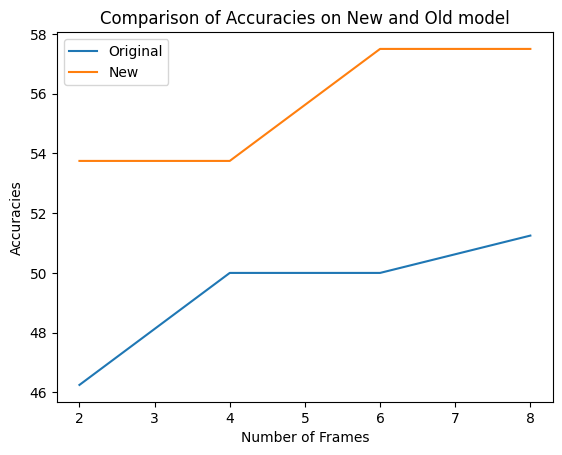

In [ ]:
x_ticks = [2, 4, 6, 8]

plt.plot(x_ticks, original_test_acc, label='Original')
plt.plot(x_ticks, new_test_acc, label='New')

plt.xlabel('Number of Frames')
plt.ylabel('Accuracies')
plt.title('Comparison of Accuracies on New and Old model')

plt.legend()

plt.show()

### Plots

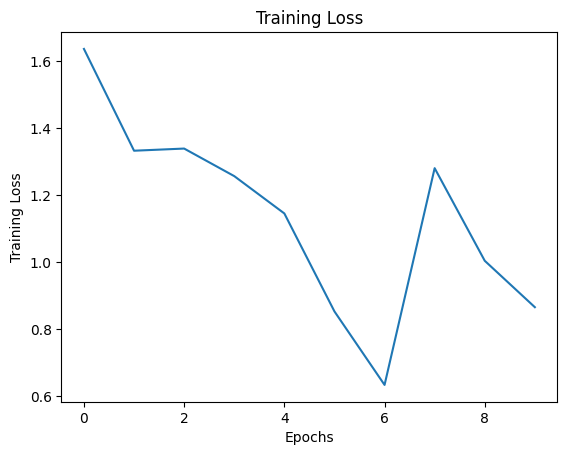

In [ ]:
names = list(a.keys())
values = list(a.values())
plt.plot(range(len(a)), values)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss')
# plt.grid()
plt.show()

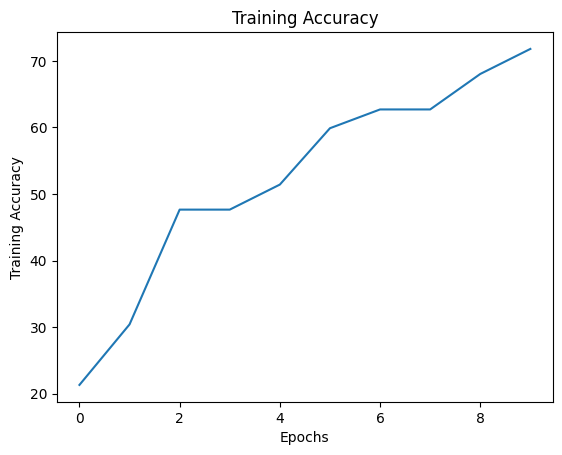

In [ ]:
names = list(b.keys())
values = list(b.values())
plt.plot(range(len(b)), values)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy')
# plt.grid()
plt.show()

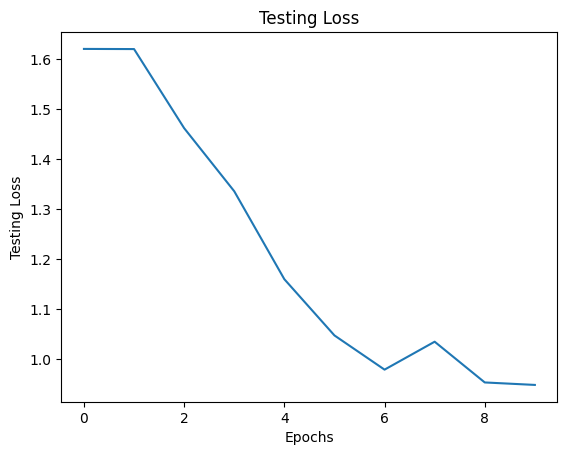

In [ ]:
names = list(c.keys())
values = list(c.values())
plt.plot(range(len(c)), values)
plt.xlabel('Epochs')
plt.ylabel('Testing Loss')
plt.title('Testing Loss')
# plt.grid()
plt.show()

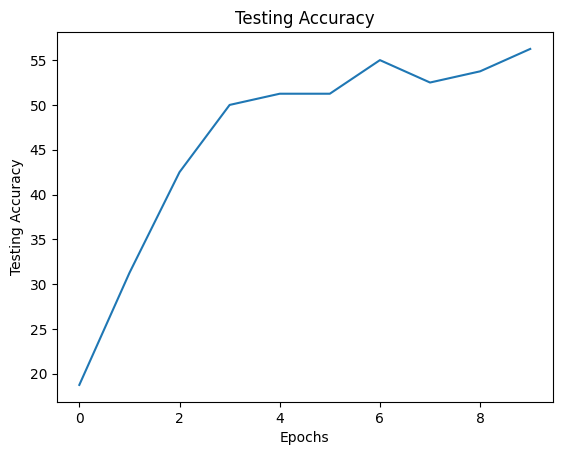

In [ ]:
names = list(d.keys())
values = list(d.values())
plt.plot(range(len(d)), values)
plt.xlabel('Epochs')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy')
# plt.grid()
plt.show()

## Grayscale images

### Changing to Grayscale

In [ ]:
train_transformer_gray = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),
            transforms.Grayscale(num_output_channels=3),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])
test_transformer_gray = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.Grayscale(num_output_channels=3),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])


In [ ]:
train_dsg = VideoDataset(ids= train_ids, labels= train_labels, transform= train_transformer_gray)
test_dsg = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer_gray)

In [ ]:
clip_dataloader_traing = DataLoader(train_dsg, batch_size=8,
                        shuffle=True, num_workers=4)
clip_dataloader_testg = DataLoader(test_dsg, batch_size=8,
                        shuffle=False, num_workers=4)

### Model

In [ ]:
class Rnn3D(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Rnn3D, self).__init__()

        #calling conv3d module for convolution
        conv1 = nn.Conv3d(in_channels = n_frames, out_channels = 50, kernel_size = 2, stride = 1)

        #calling MaxPool3d module for max pooling with downsampling of 2
        pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=2)

        conv2 =  nn.Conv3d(in_channels = 50, out_channels = 100, kernel_size = (1, 3, 3), stride = 1)

        pool2 = nn.MaxPool3d(kernel_size=(1, 3, 3), stride=2)

        self.feat_extractor=nn.Sequential(conv1,nn.ReLU(),pool1,conv2,nn.ReLU(),pool2)

        self.rnn = nn.LSTM(input_size=5625, hidden_size=256, num_layers=1,batch_first=True)
        self.fc1 = nn.Linear(256, 5)



    def forward(self, x):

        b_z, ts, c, h, w = x.shape

        y = self.feat_extractor(x)

        # reinstating the batchsize and frames
        y = y.view(b_z,ts,-1)
        #output has a size of 8x16x128 - basically we have the output for each frame of each clip.
        outp, (hn, cn) = self.rnn(y)
        # We only need the RNN/LSTM output of the last frame since it incorporates all the frame knowledge
        out = self.fc1(outp[:,-1,:])
        return out



model_rnn_g = Rnn3D().to(device)

#Printing the network architecture
print(model_rnn_g)


Rnn3D(
  (feat_extractor): Sequential(
    (0): Conv3d(16, 50, kernel_size=(2, 2, 2), stride=(1, 1, 1))
    (1): ReLU()
    (2): MaxPool3d(kernel_size=(1, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv3d(50, 100, kernel_size=(1, 3, 3), stride=(1, 1, 1))
    (4): ReLU()
    (5): MaxPool3d(kernel_size=(1, 3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (rnn): LSTM(5625, 256, batch_first=True)
  (fc1): Linear(in_features=256, out_features=5, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_rnn_g.parameters(), lr=1e-4)

In [ ]:
model_rnn_g.train()
print_every = 20
a,b,c,d=train_3d(model_rnn_g, loss_fn, optimizer,clip_dataloader_traing,clip_dataloader_testg, num_epochs=10)
model_rnn_g.eval()
check_accuracy_3d(model_rnn_g, clip_dataloader_traing,loss_fn)
check_accuracy_3d(model_rnn_g, clip_dataloader_testg,loss_fn,True)

Test Accuracy 15 / 80 correct (18.75)
Train Accuracy 68 / 319 correct (21.32)
Starting epoch 1 / 10
t = 20, loss = 1.5140
t = 40, loss = 1.6747
Test Accuracy 27 / 80 correct (33.75)
Train Accuracy 107 / 319 correct (33.54)
Starting epoch 2 / 10
t = 20, loss = 1.4039
t = 40, loss = 1.2509
Test Accuracy 36 / 80 correct (45.00)
Train Accuracy 135 / 319 correct (42.32)
Starting epoch 3 / 10
t = 20, loss = 1.4130
t = 40, loss = 0.9576
Test Accuracy 35 / 80 correct (43.75)
Train Accuracy 139 / 319 correct (43.57)
Starting epoch 4 / 10
t = 20, loss = 1.2563
t = 40, loss = 1.2436
Test Accuracy 31 / 80 correct (38.75)
Train Accuracy 176 / 319 correct (55.17)
Starting epoch 5 / 10
t = 20, loss = 0.8342
t = 40, loss = 0.9827
Test Accuracy 40 / 80 correct (50.00)
Train Accuracy 178 / 319 correct (55.80)
Starting epoch 6 / 10
t = 20, loss = 1.0509
t = 40, loss = 1.3042
Test Accuracy 43 / 80 correct (53.75)
Train Accuracy 204 / 319 correct (63.95)
Starting epoch 7 / 10
t = 20, loss = 1.3084
t = 40, 

(52.5, 1.0645244121551514)

### Plots

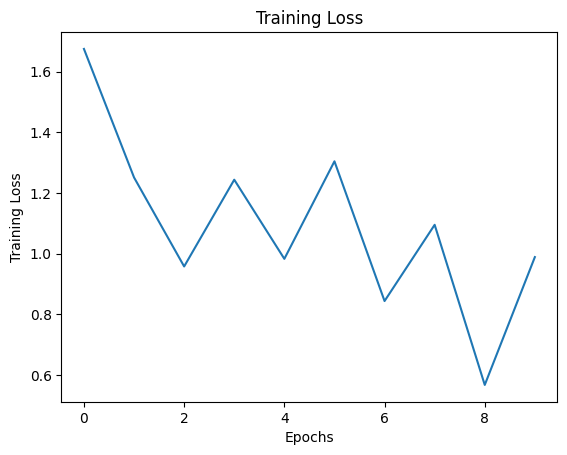

In [ ]:
names = list(a.keys())
values = list(a.values())
plt.plot(range(len(a)), values)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss')
# plt.grid()
plt.show()

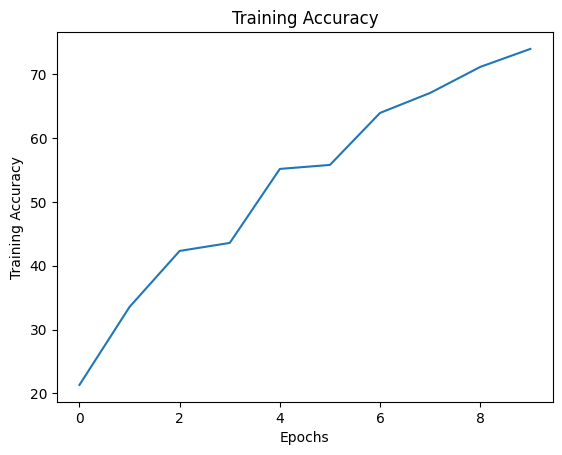

In [ ]:
names = list(b.keys())
values = list(b.values())
plt.plot(range(len(b)), values)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy')
# plt.grid()
plt.show()

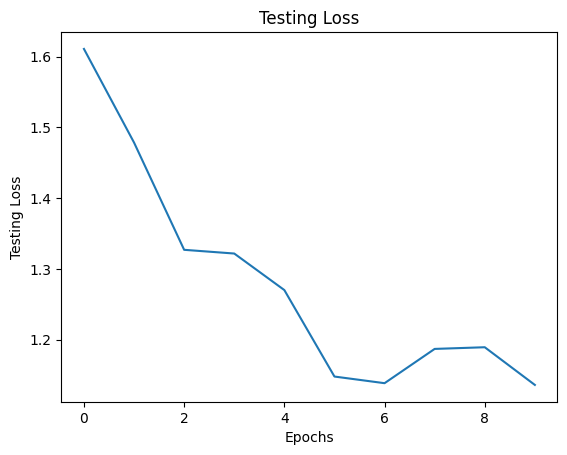

In [ ]:
names = list(c.keys())
values = list(c.values())
plt.plot(range(len(c)), values)
plt.xlabel('Epochs')
plt.ylabel('Testing Loss')
plt.title('Testing Loss')
# plt.grid()
plt.show()

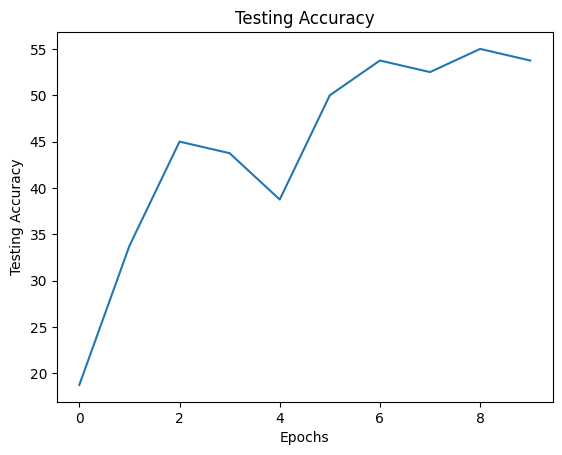

In [ ]:
names = list(d.keys())
values = list(d.values())
plt.plot(range(len(d)), values)
plt.xlabel('Epochs')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy')
# plt.grid()
plt.show()

## Saving Models:

In [ ]:
import pickle

In [ ]:
filename = 'original_model.sav'
pickle.dump(fixed_model_3d.cpu(), open(filename, 'wb'))

In [ ]:
filename = 'new_model.sav'
pickle.dump(model_rnn.cpu(), open(filename, 'wb'))

In [ ]:
torch.save(model_rnn, 'new_model_torch.pt')

In [ ]:
torch.save(fixed_model_3d, 'old_model_torch.pt')